# FLOW ANALYSIS

<i>
<br>  This Notebook is used to analysis flow of pcap file packets by grouping and according to Internet Protocol Addresses. (ip_addr) <br>
Here ananlysis is done as Source and Destination Ip_addr and port. <br>
To Get clear picture and try to analysis in genera setting opposite to verify specific analysis according to some rules or protocol or signature.<br>
This Minimalistic cover gives enough details.<br> </i>

###### NOTE: Here EdgeCases are not covered for example ::  if ipv6_addr is present or not so, might throw an error. Because it is preffered and good to launch version1 or v1 and Mange the flow as per time passes

## NoteBook Flow

This Flow represents General Setting of Whole Notebook and Process undertaken leading to end result Ananlysis and Dependancy on User Interpretaion.<br>
Here block-type-structures are used to represent the flow and details of each block if applicable is represented beneath/within the desired cell body.<br>

<img src="images_in/ProjectFlow2.png">

## Port Numbers
<br> In computer networking, a port is a communication endpoint. <br>
At the software level, within an operating system, a port is a logical construct that identifies a specific process or<br>
a type of network service. Ports are identified for each protocol and address combination by 16-bit unsigned numbers,<br> 
commonly known as the port number. The most common protocols that use port numbers are the<br> 
Transmission Control Protocol (TCP) and the User Datagram Protocol (UDP).<br>

A port number is always associated with an IP address of a host and the protocol type of the communication.<br>
It completes the destination or origination network address of a message. Specific port numbers are commonly reserved 
to identify specific services, so that an arriving packet can be easily forwarded to a running application.<br>


#### Common Port Numbers
<img src="images_in/common_port_numbers_wiki.png">


### In this Notebook Port Numbers play a vital role for both General Setting Analysis and Specific Terms or Desired Analysis, For Quick Note or Understanding above image or below link is prefferef for refference

<br>
<a href="https://en.wikipedia.org/wiki/List_of_TCP_and_UDP_port_numbers" target="_blank" >Port Numbers (visit for detailed reffer)</a>


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from os import path
import subprocess

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from prettytable import PrettyTable

sns.set(color_codes=True)
%matplotlib inline


In [2]:
#Variables

count = 1

In [3]:

def read_file(in_file,out_file,ip_type):
    """
    
    This function is used to extract features useful for data plotting and visualization from pcap file,
    by using wireshark tshark utlitiy feature called Output Extraction and done by use of os-subprocess
    module to execute commands on the bash and use standard ouput for either _STDOUT_ or _STDERR_ .
    It mainly used to read pcap file and write csv file into memory.
    
    param in_file: path of pcap file
    param out_file: path where to save csvs file derived from pcap_file
    param ip_type; type of csv file either ipv4 or ipv6, if ip_type:= 0 then ip_type:= ip else ip_type:=ipv6
    
    return: None
    """
    
    ip_proto="ip"
    proto = "-e tcp.srcport -e tcp.dstport -e udp.srcport -e udp.dstport -e frame.cap_len"
    ip_command = "tshark -r {} -Y 'ip' -T fields -e ip.src -e ip.dst -e ip.proto {} -E header=y -E occurrence=a -E separator=, -E aggregator=';' > {}"
    out_file = out_file+str(ip_type)+'.csv'
    
    if ip_type != 0:
        ip_proto="ipv6"
        ip_command = "tshark -r {} -Y 'ipv6' -T fields -e ipv6.src -e ipv6.dst -e ipv6.nxt {}  -E header=y -E occurrence=a -E separator=, -E aggregator=';' > {}"
    
    #command = "tshark -T fields -e frame.number -e frame.time -e frame.protocols -e ip.proto -e ipv6.nxt 
    #-e ip.src -e ipv6.src -e tcp.srcport -e udp.srcport -e ip.dst -e ipv6.dst -e tcp.dstport 
    #-e udp.dstport -e frame.cap_len -E header=y -E occurrence=a 
    #-E separator=, -E aggregator=';' -r {} > {} "

    tshark_command = ip_command.format(in_file,proto,out_file)

    bol_check = False
    if path.isfile(in_file):
        process = subprocess.run(tshark_command,stdout=subprocess.PIPE,stderr=subprocess.STDOUT,
                        shell=True,check=False)
        if process.returncode == 0:
            bol_check = True

    if not bol_check:
        print("File Exception !!")
    else:
        print("Go Ahead out__all.csv")
    

In [4]:
def read_csv(path):
    """
    This function is used to read csv file and return a copy for further execution.
    
    param path: path of csv file
    
    return: data frame deep copy
    """
    df = pd.read_csv(path,error_bad_lines=False,low_memory=False)
    
    return df.copy(deep=True)


In [5]:
def data_frames(in_file,out_file_path):
    """
    This function is used to read pcap file and filter out into ipv4 and ipv6 csv files or dataframes.
    Here 0 indicates ipv4 and 1 indicated ipv6.
    This function passes argumnets to func() read_file with param in_file_path,out_file_path,ip_type and 
    then thereafter passes arguments to func() read_csv linearly for ipv4 and ipv6 csv file.
    
    param in_file: path from where to read pcap file
    param out_file_path: path where to csv file
    
    return : dataframes
    """
    read_file(in_file,out_file_path,0)
    read_file(in_file,out_file_path,1)
    df1 = read_csv(out_file_path+'0.csv')
    df2 = read_csv(out_file_path+'1.csv')
    
    return df1,df2

In [6]:
def polish_data_frames(df1,df2):
    """
    This function is used to reframe and polish dataframes. At first dataframes are polished by replacing
    NAN with empty_space as value and thereafter dataframe columns are converted into String_type i.e.
    Type Conversion. After Conversion deep copy of dataframes is created and filterd as tcp/udp source and 
    destination port dataframes and thereafter merge together as single i.e. two columns into one column
    replace empty_space row with non_empty_space row.
    Then DataFrames are reduced to usefull items i.e Features and Corrective Data for plotting and visualization
    and Stats.
    At last type_conversion is done again now as __OBJECT_TYPE__ .
    
    param df1: dataframe
    param df2: dataframe
    
    return : dataframes named as df1 and df2
    """

    df1.fillna('',inplace=True)
    df2.fillna('',inplace=True)
    df1 = df1.astype(str)
    df2 = df2.astype(str)

    temp_df1 = df1[['tcp.srcport','tcp.dstport','udp.srcport','udp.dstport']].copy(deep=True)
    temp_df2 = df2[['tcp.srcport','tcp.dstport','udp.srcport','udp.dstport']].copy(deep=True)
    temp_df1['srcport'] = temp_df1['tcp.srcport'] + temp_df1['udp.srcport']
    temp_df1['dstport'] = temp_df1['tcp.dstport'] + temp_df1['udp.dstport']
    temp_df2['srcport'] = temp_df2['tcp.srcport'] + temp_df2['udp.srcport']
    temp_df2['dstport'] = temp_df2['tcp.dstport'] + temp_df2['udp.dstport']
    
    df1[['srcport','dstport']] = temp_df1[['srcport','dstport']]
   
    df1 = df1[['ip.src','ip.dst','ip.proto','srcport','dstport','frame.cap_len']]
    df2[['ip.src','ip.dst','ip.proto','frame.cap_len']] = df2[['ipv6.src','ipv6.dst','ipv6.nxt','frame.cap_len']].copy(deep=True)
    df2[['srcport','dstport']] = temp_df2[['srcport','dstport']]
    df2 = df2[['ip.src','ip.dst','ip.proto','srcport','dstport','frame.cap_len']]
    
    df1 = df1.astype(object)
    df2 = df2.astype(object)

    return df1,df2
    


In [7]:
def print_frequent_charac(df):
    """
    This function is used to print stats for passed argument i.e. DataFrame. It is done on the basis of
    four parameters i.e source_ip_address, destination_ip_address, source_port, destination_port
    It is done linearly from source_ip_addr to destination_port.
    Stats are printed as top parameter and top sub-parameters showing communication done with whom
    the most or commonly or frequently.
    To Achieve the purpose list remove func() is used and for-loop is used in Order of N.
    
    param df: dataframe used to generate or print stats
    
    return: None
    """
    
    lst = ['ip.src','ip.dst','srcport','dstport']
    ilist = [0,1,2,3]
    table = PrettyTable(['TOP','PR1','PR2','PR3'])
    
    for xi in range(4):
        
        aitem = lst[xi]
        top = df[aitem].describe()['top']
        ilist_cp = ilist.copy()
        ilist_cp.remove(xi)
        temp_list = []
        
        for item in ilist_cp:
            temp_list.append(df[df[aitem]==top][lst[item]].describe()['top'])
        table.add_row([top,temp_list[0],temp_list[1],temp_list[2]])
    print(table)
      
        
    

In [8]:
def plot_source_address(df,fname):
    
    source_addresses  = df.groupby("ip.src")['bytes'].sum()
    x = len(source_addresses)
    
    fig,ax = plt.subplots(figsize=(int(x/2),x))
    
    ax.set_title('Address Sending Payloads',fontsize=24)
    ax.set_ylabel('IP Address',fontsize=20)
    ax.set_xlabel('Data (in Bytes) Sent in Total',fontsize=20)
    ax.set_aspect('auto')
    source_addresses.plot(ax=ax,kind='barh',legend=False,stacked=False,fontsize=18)
    
    fig.savefig('images_out/images_out_nt_ana/'+str(count)+fname+'_ip_src_addr_bar_graph.png',bbox_inches='tight',papertype='a4',
               color=plt.cm.Paired(np.arange(len(source_addresses)))
               )
    
  

In [9]:
def plot_destination_address(df,fname):
    
    destination_addresses = df.groupby("ip.dst")['bytes'].sum()
    x = len(destination_addresses)
    
    fig,ax = plt.subplots(figsize=(int(x/2),x))
    
    ax.set_title('Destination Addresses (Bytes Received)',fontsize=24)
    ax.set_ylabel('IP Address',fontsize=20)
    ax.set_xlabel('Data (in Bytes) Sent in Total',fontsize=20)
    destination_addresses.plot(ax=ax,kind='barh',legend=False,stacked=False,fontsize=18)
   
    fig.savefig('images_out/images_out_nt_ana/'+str(count)+fname+'_ip_dst_addr_barh_graph.png',bbox_inches='tight',papertype='a4'
               ,color=plt.cm.Paired(np.arange(len(destination_addresses))))


In [10]:
def plot_source_port(df,fname):
    
    source_payloads = df.groupby("srcport")['bytes'].sum()
    x = len(source_payloads)
    
    fig,ax = plt.subplots(figsize=(int(x/2),x))
    
    ax.set_title("Source Ports (Bytes Sent)",fontsize=24)
    ax.set_ylabel('Port Number',fontsize=20)
    ax.set_xlabel('Data (in Bytes) Sent in Total',fontsize=20)
    source_payloads.plot(ax=ax,kind='barh',legend=False,stacked=False,fontsize=18)
    
    
    fig.savefig('images_out/images_out_nt_ana/'+str(count)+fname+'_srcport_barh_graph.png',bbox_inches='tight',papertype='a4'
               ,color=plt.cm.Paired(np.arange(len(source_payloads))))
    

In [11]:
def plot_destination_port(df,fname):
    
    destination_payloads = df.groupby("dstport")['bytes'].sum()
    x = len(destination_payloads)
    
    fig,ax = plt.subplots(figsize=(int(x/2),x))
    
    ax.set_title("Destination Ports (Bytes Received)",fontsize=24)
    ax.set_ylabel('Port Number',fontsize=20)
    ax.set_xlabel('Data (in Bytes) Sent in Total',fontsize=20)
    destination_payloads.plot(ax=ax,kind='barh',legend=False,stacked=False,fontsize=18)
    
    
    fig.savefig('images_out/images_out_nt_ana/'+str(count)+fname+'_dstport_barh_graph.png',bbox_inches='tight',papertype='a4'
               ,color=plt.cm.Paired(np.arange(len(destination_payloads))))


In [12]:
def plot(df,fname):
    plot_source_address(df,fname)
    plot_destination_address(df,fname)
    plot_source_port(df,fname)
    plot_destination_port(df,fname)
    

## Flow of Notebook
<img src="images_in/ntanalysis.png">

In [13]:
df1,df2 = data_frames('/home/bajaj-debian/networkTrafficAnalysis/nta/tshark_out_00003_20200523143822.pcapng','/home/bajaj-debian/networkTrafficAnalysis/nta/csvs_out/')
df1,df2 = polish_data_frames(df1,df2)
df1.rename(columns={'frame.cap_len':'bytes'},inplace=True)
df2.rename(columns={'frame.cap_len':'bytes'},inplace=True)
df1['bytes'] = df1['bytes'].astype(float)
df2['bytes'] = df2['bytes'].astype(float)

Go Ahead out__all.csv
Go Ahead out__all.csv


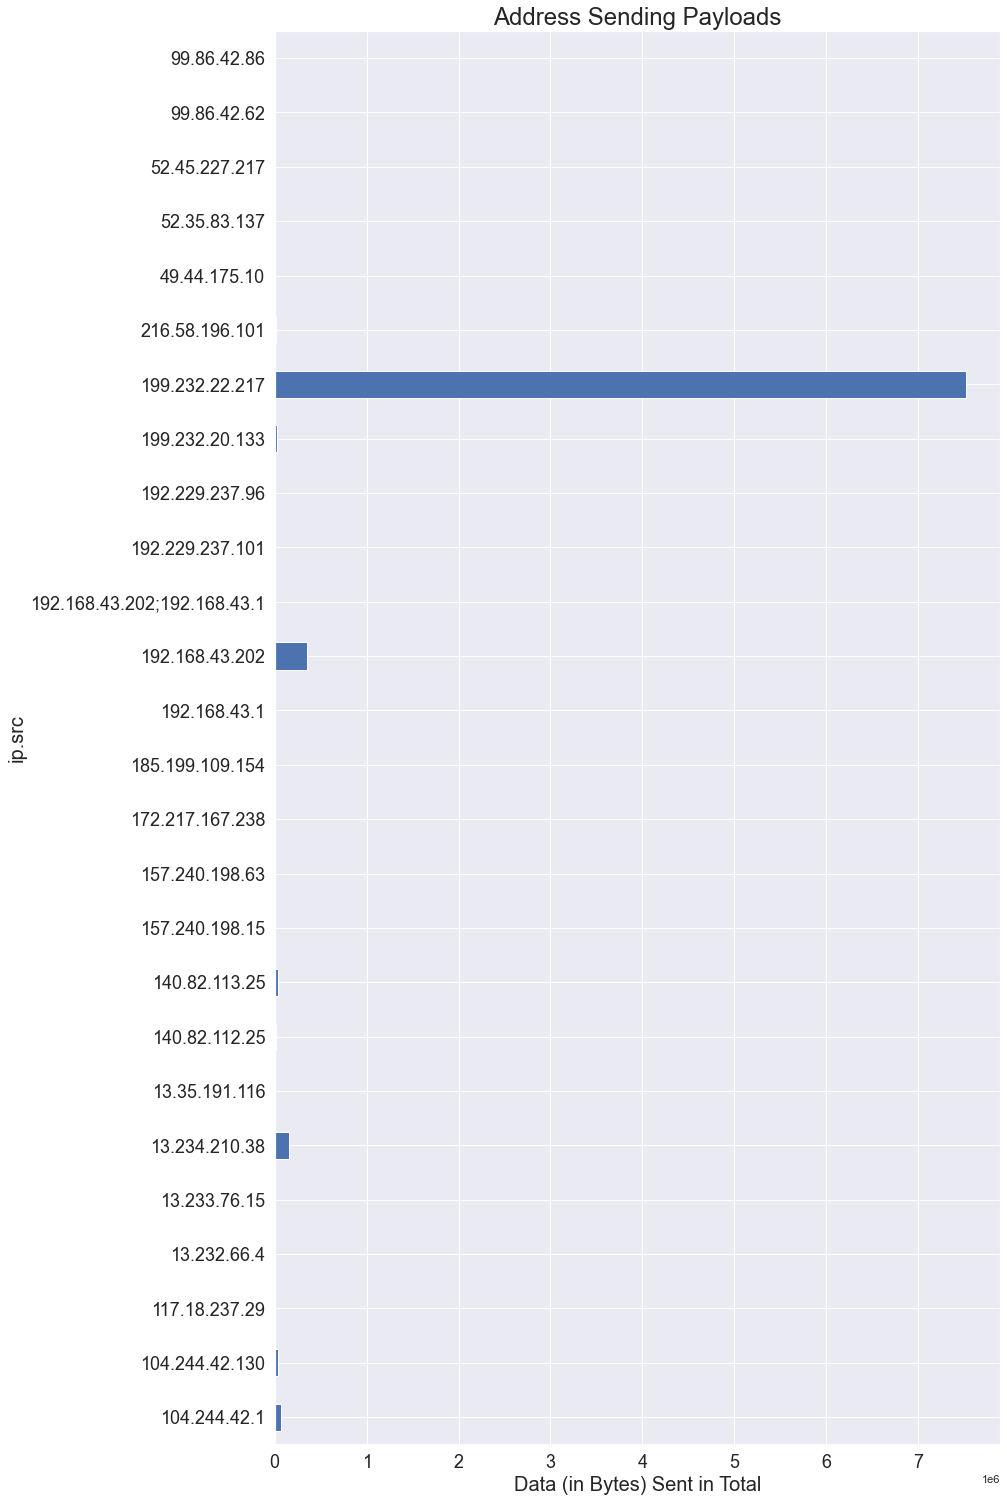

In [14]:
plot_source_address(df1,"ip")

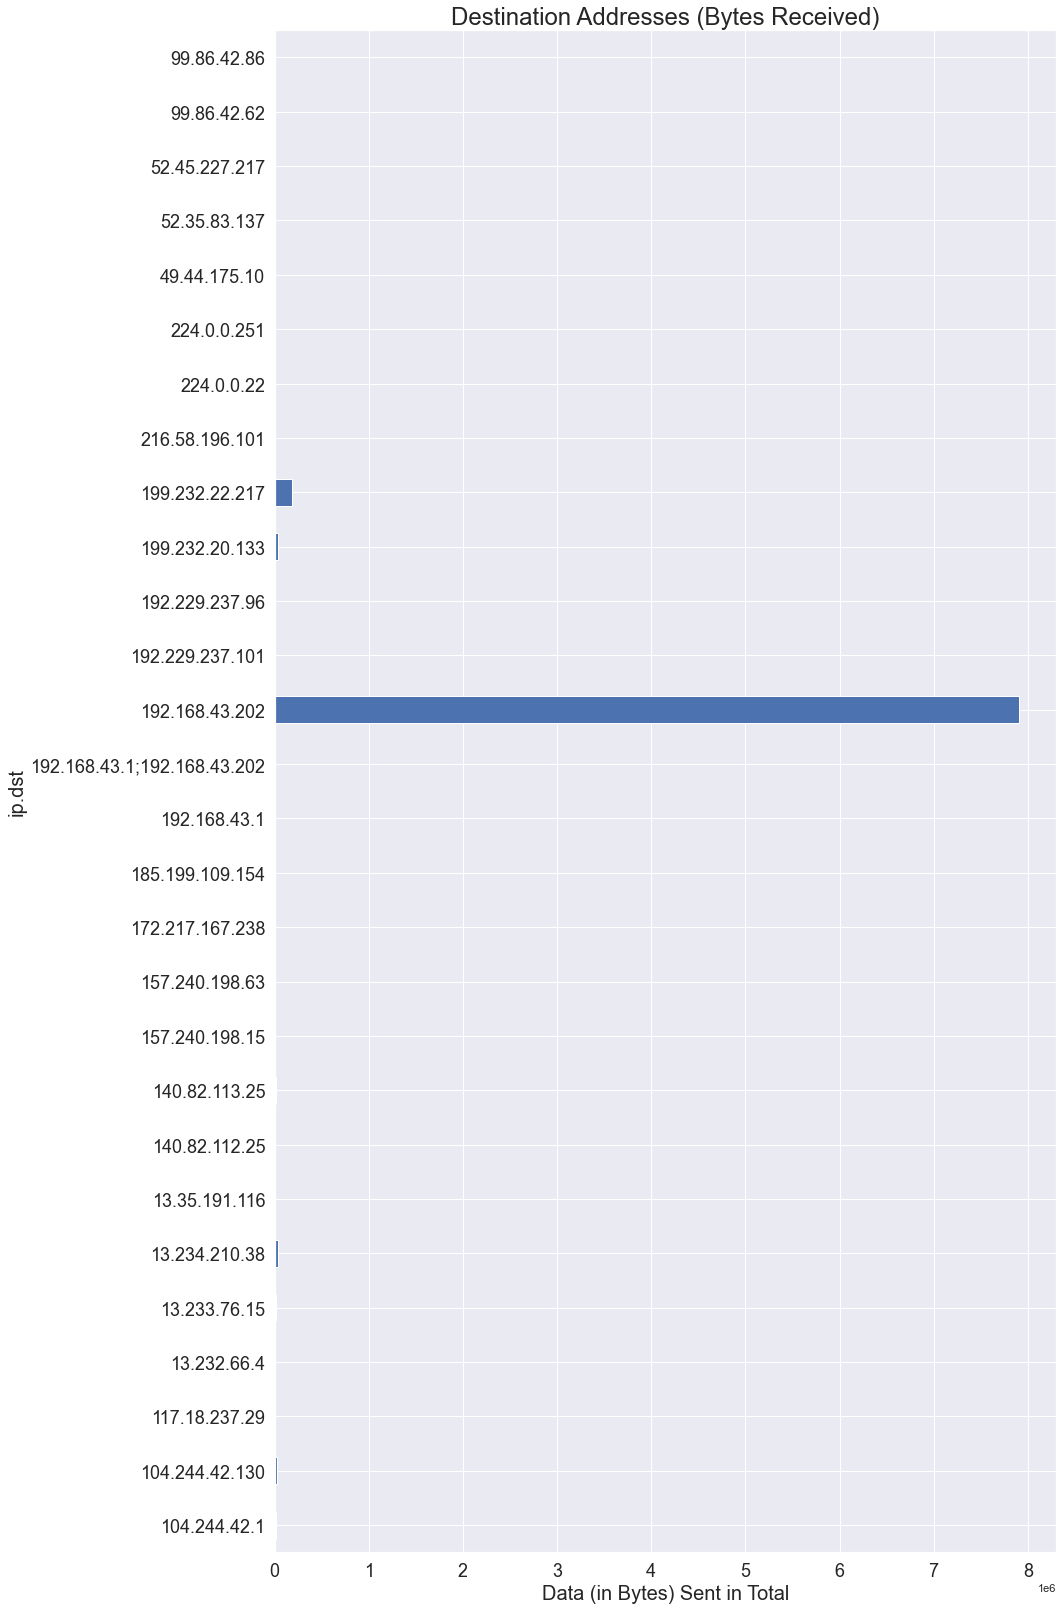

In [15]:
plot_destination_address(df1,"ip")

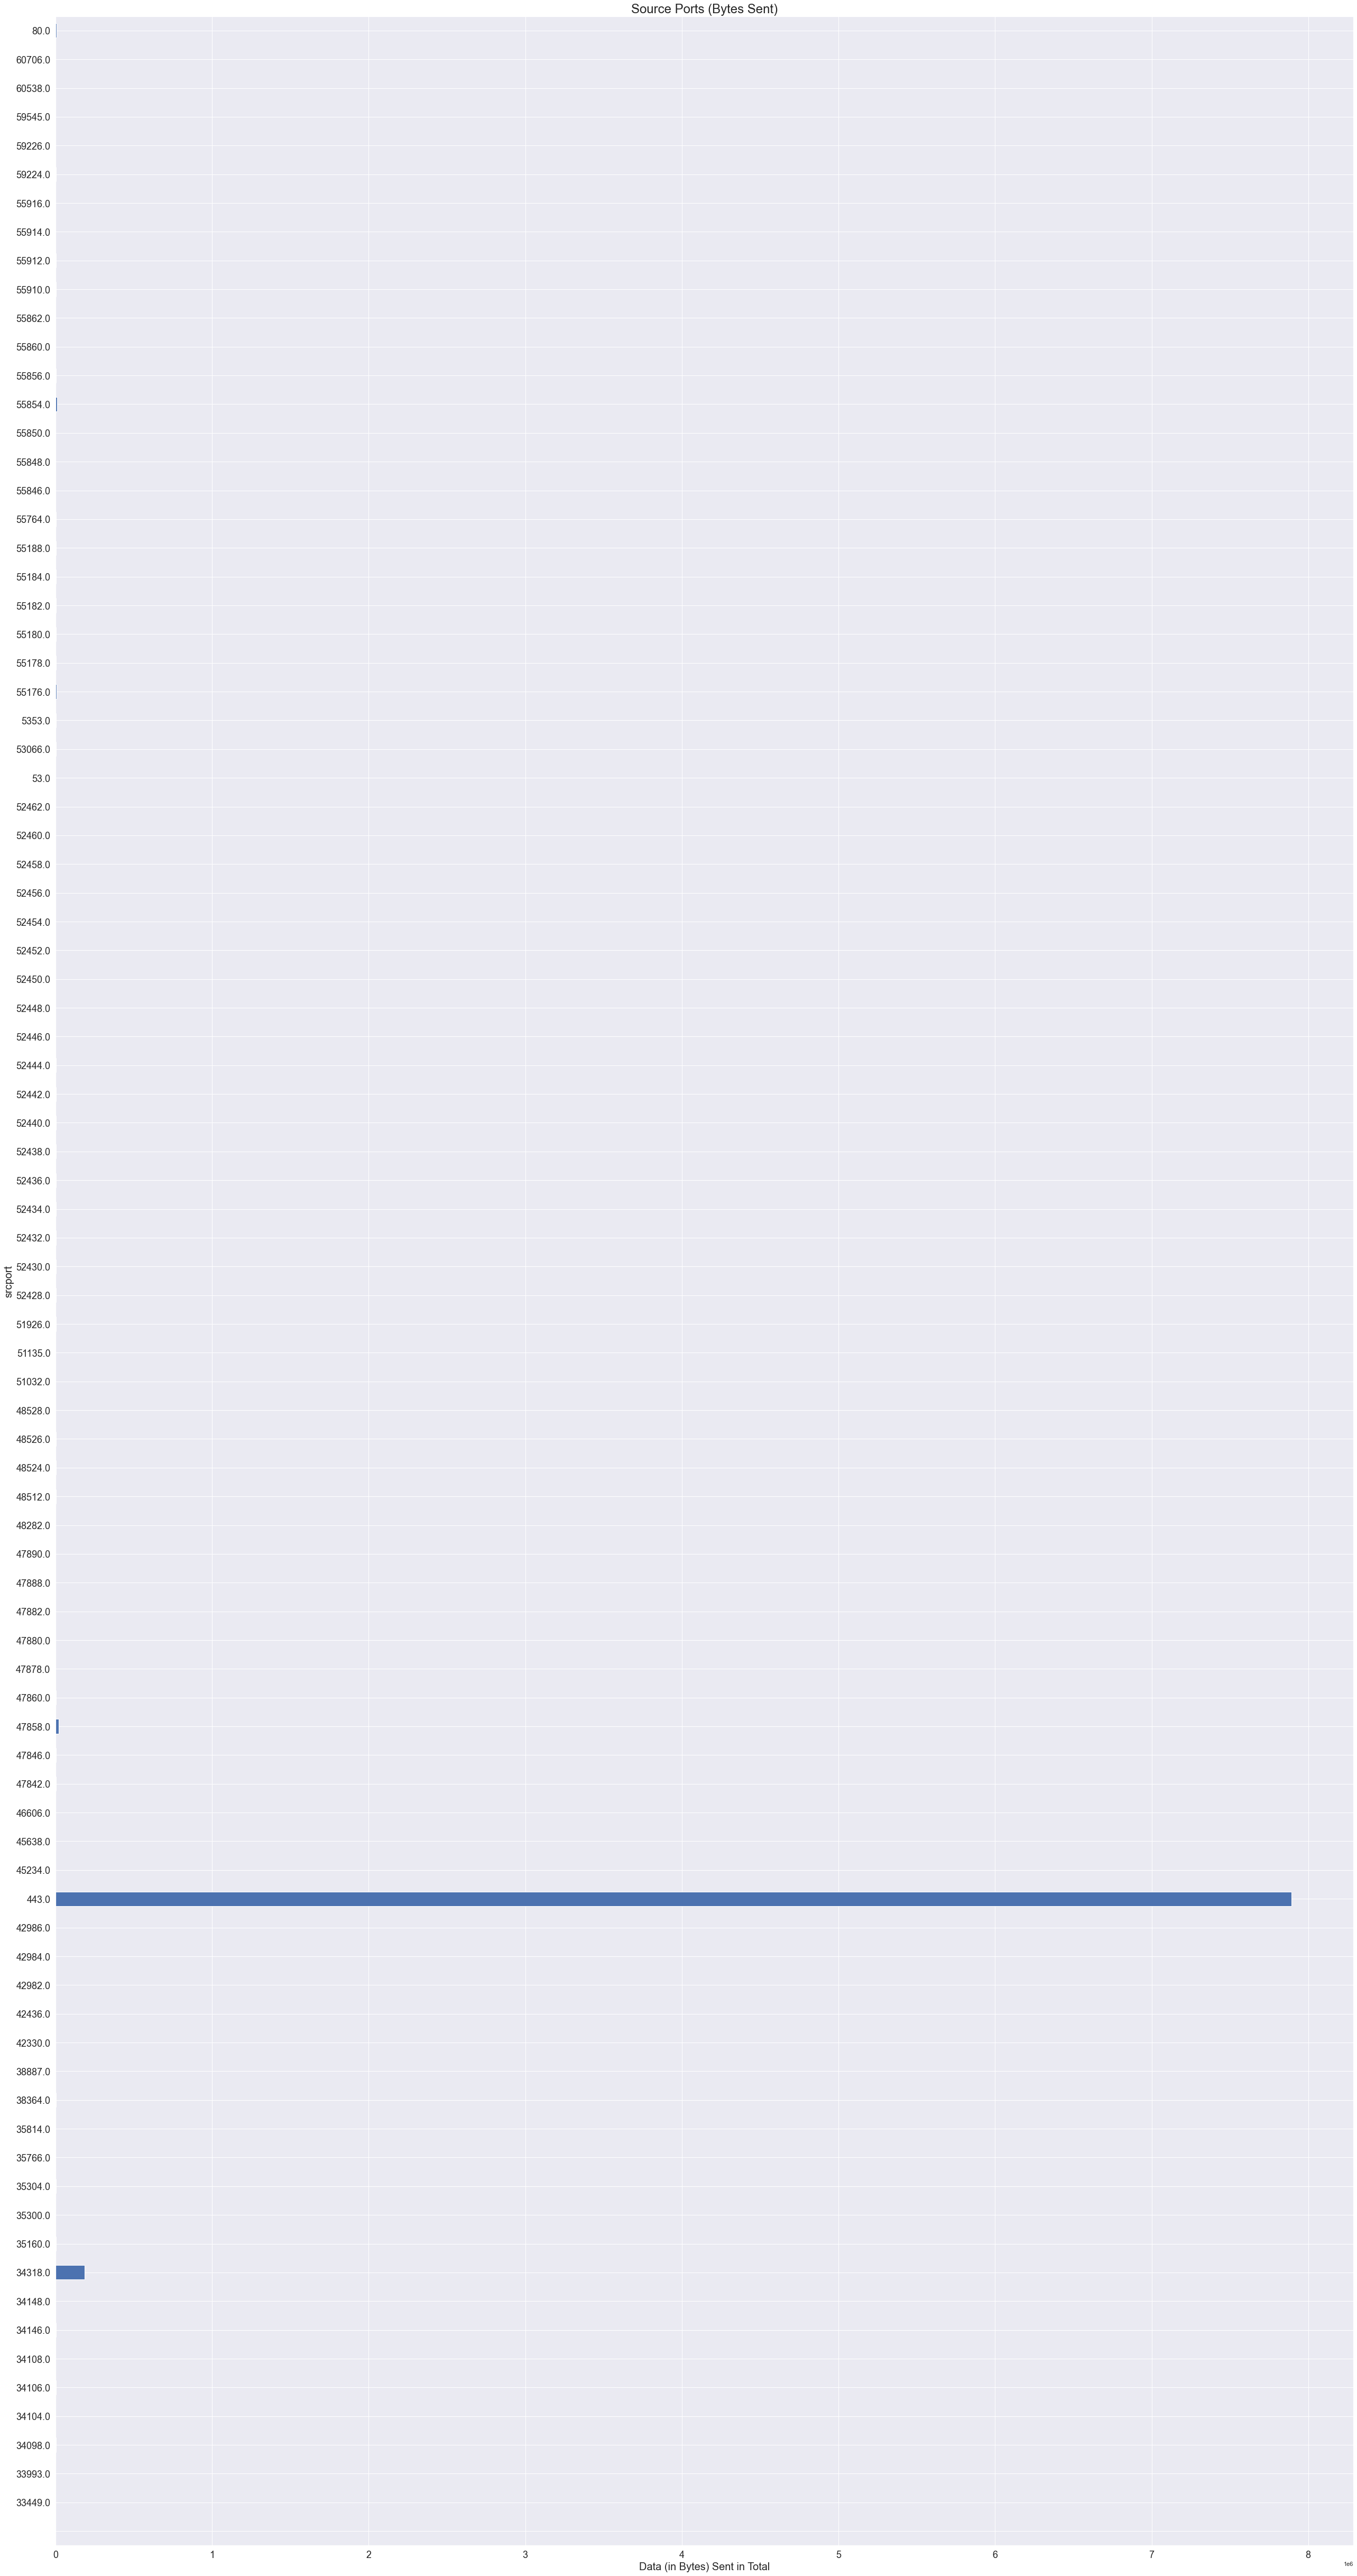

In [16]:
plot_source_port(df1,"ip")

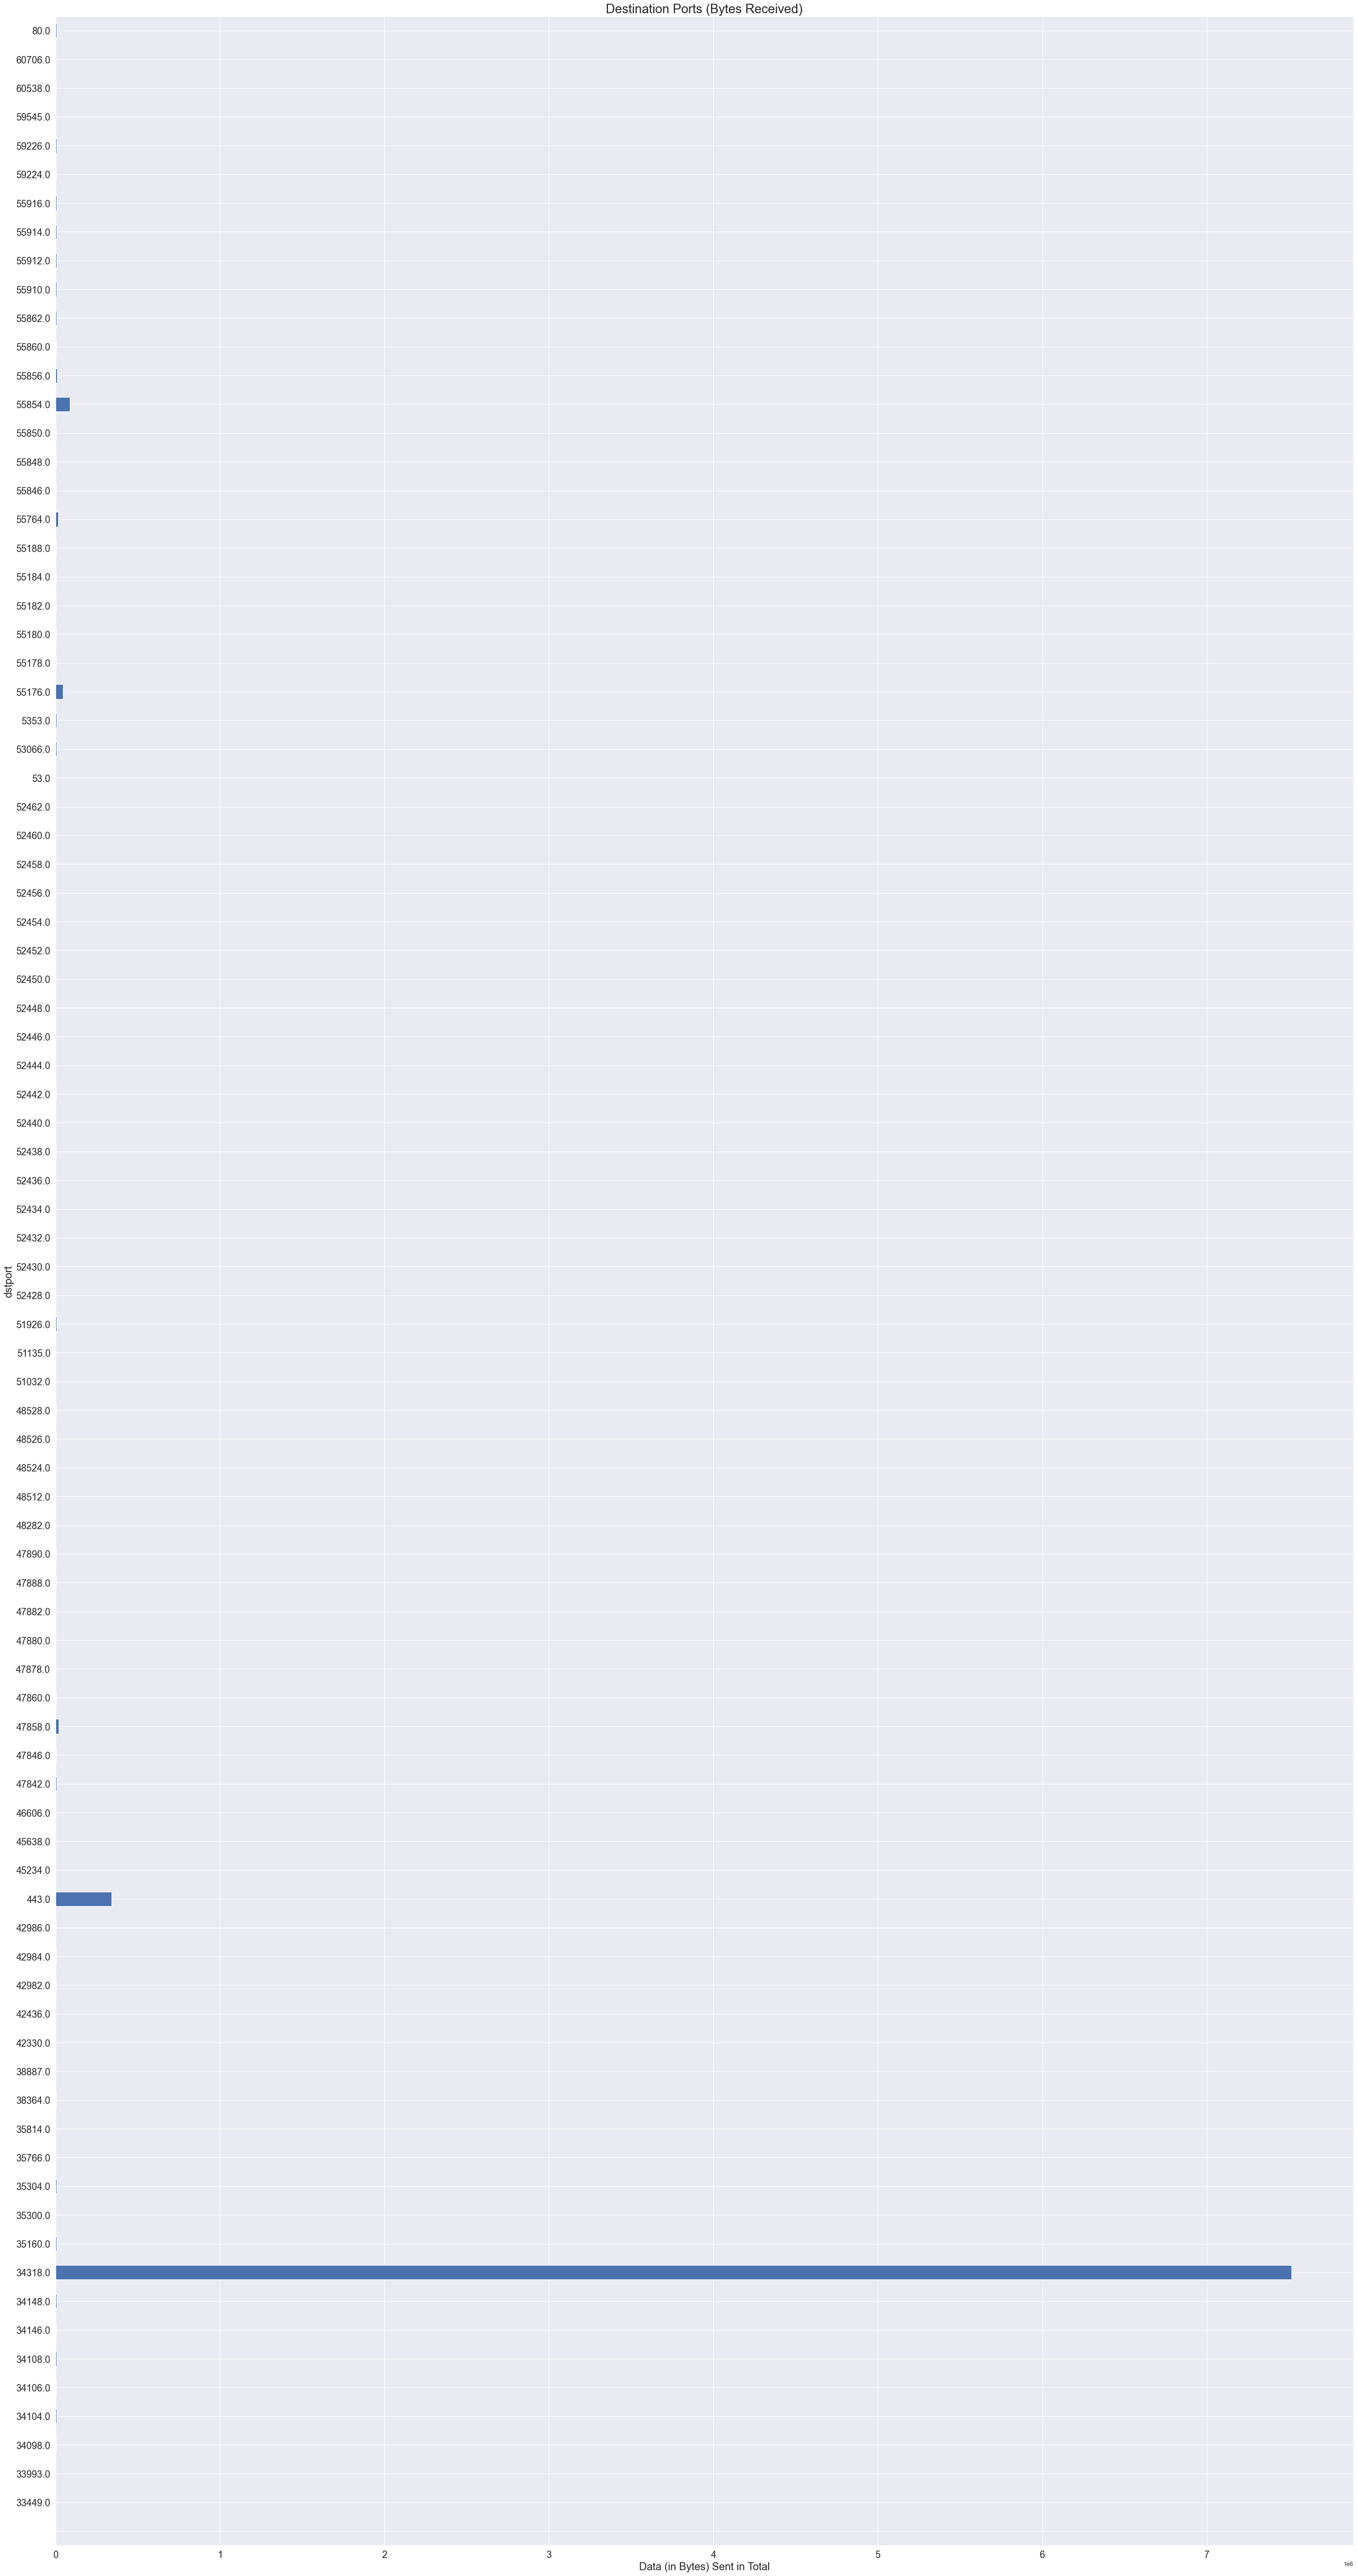

In [17]:
plot_destination_port(df1,"ip")

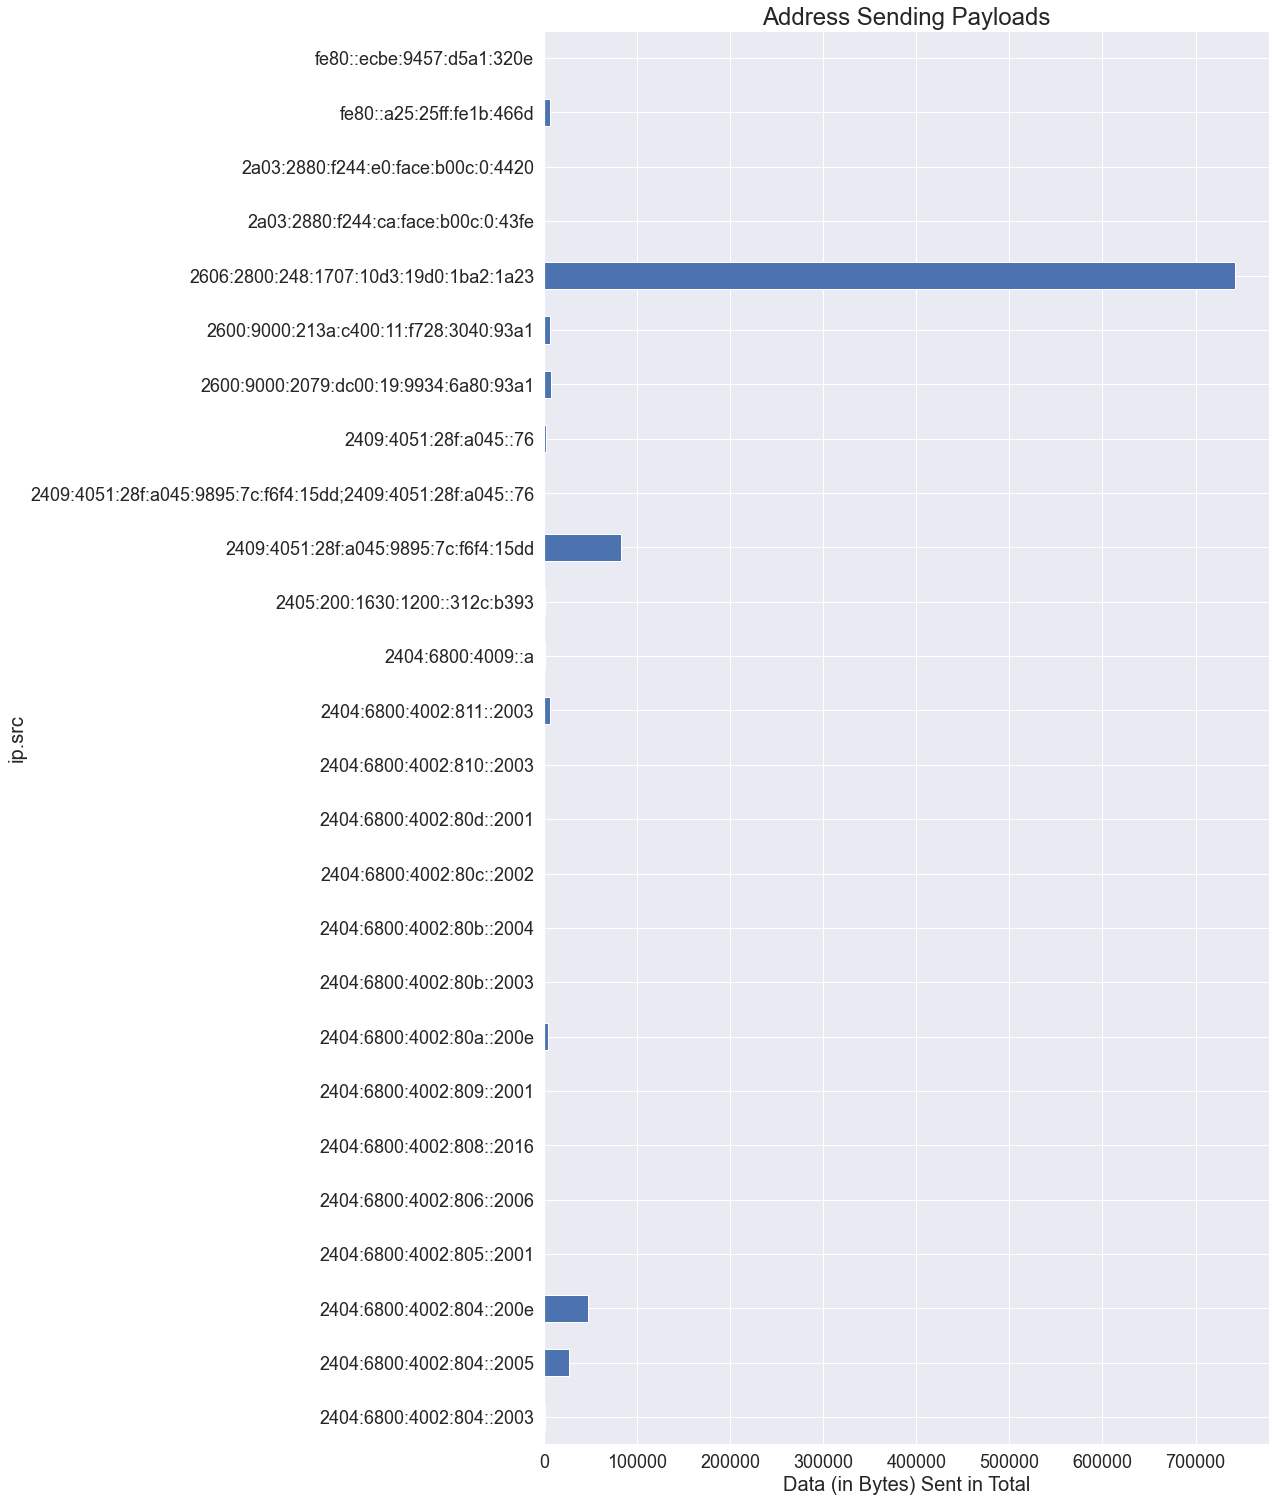

In [18]:
plot_source_address(df2,"ipv6")

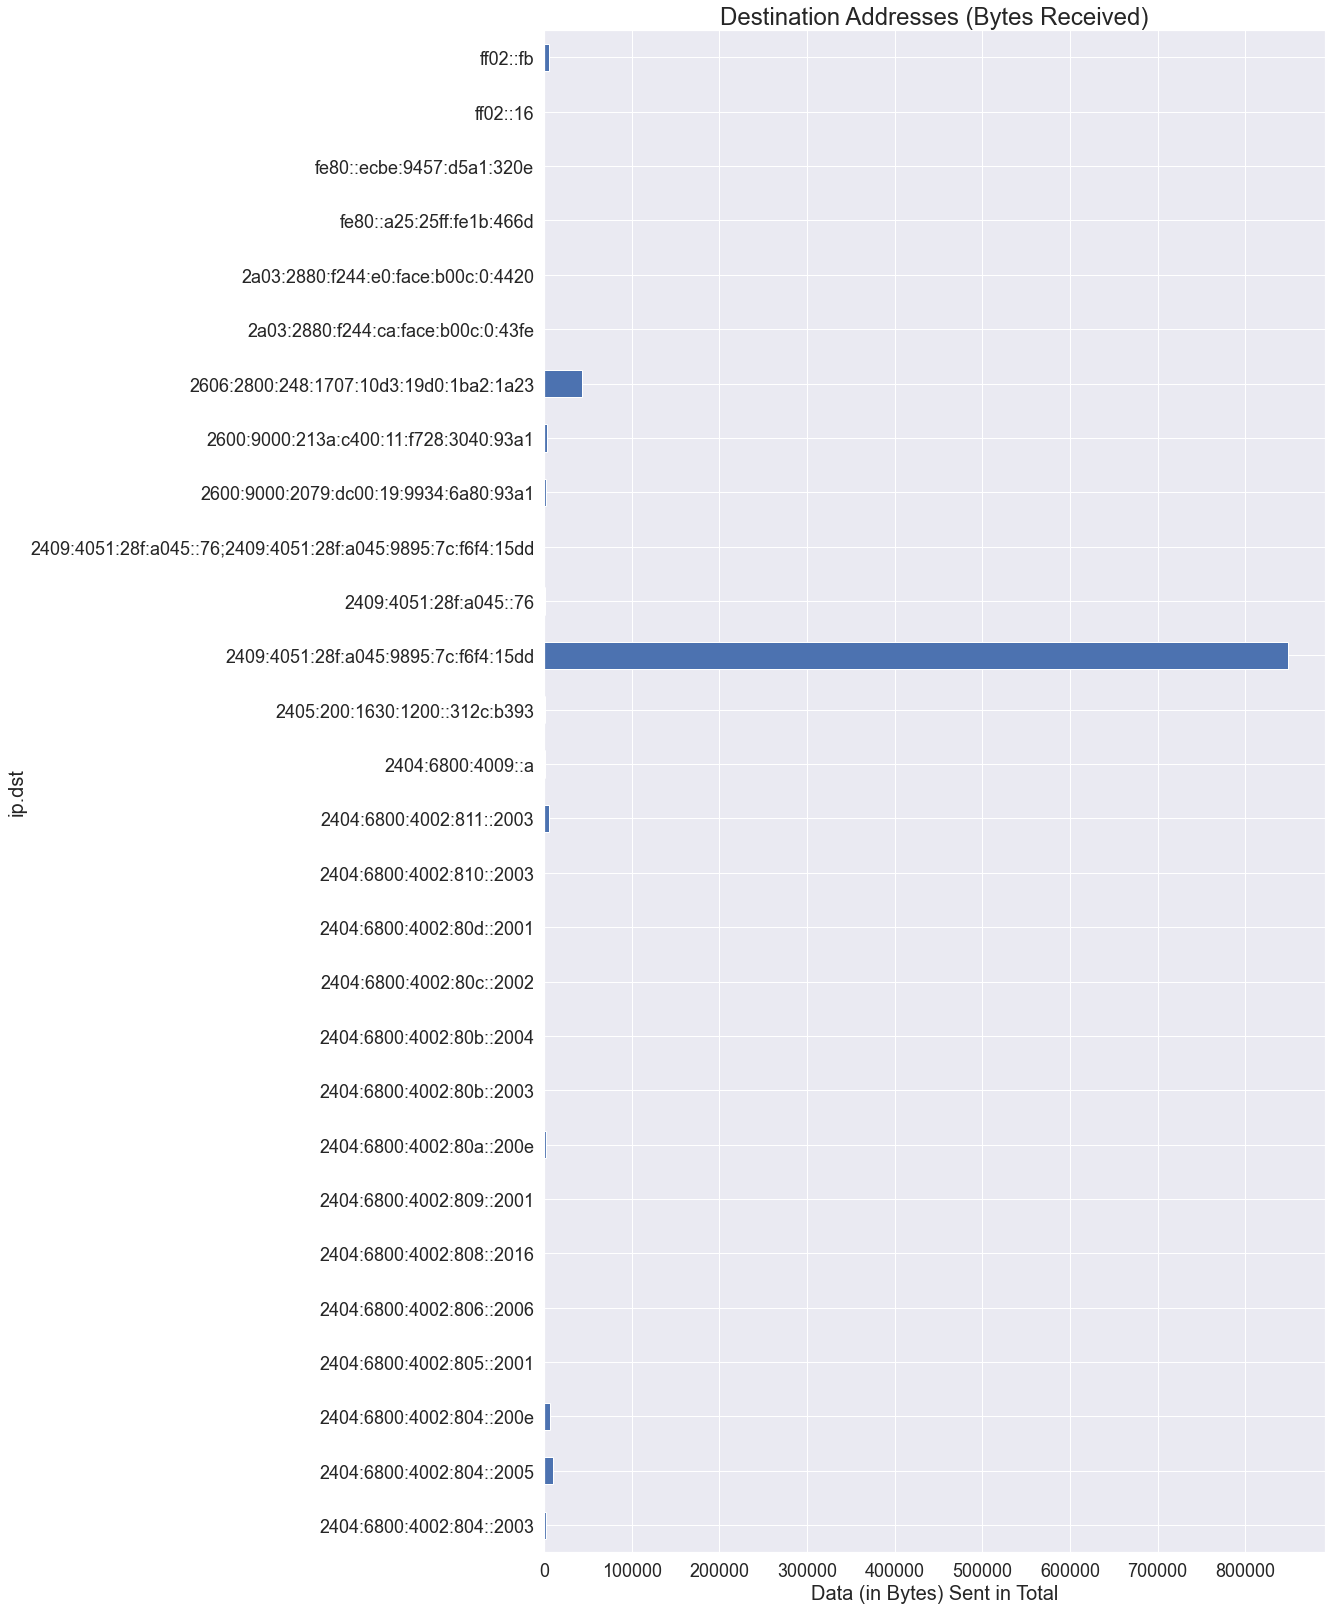

In [19]:
plot_destination_address(df2,"ipv6")

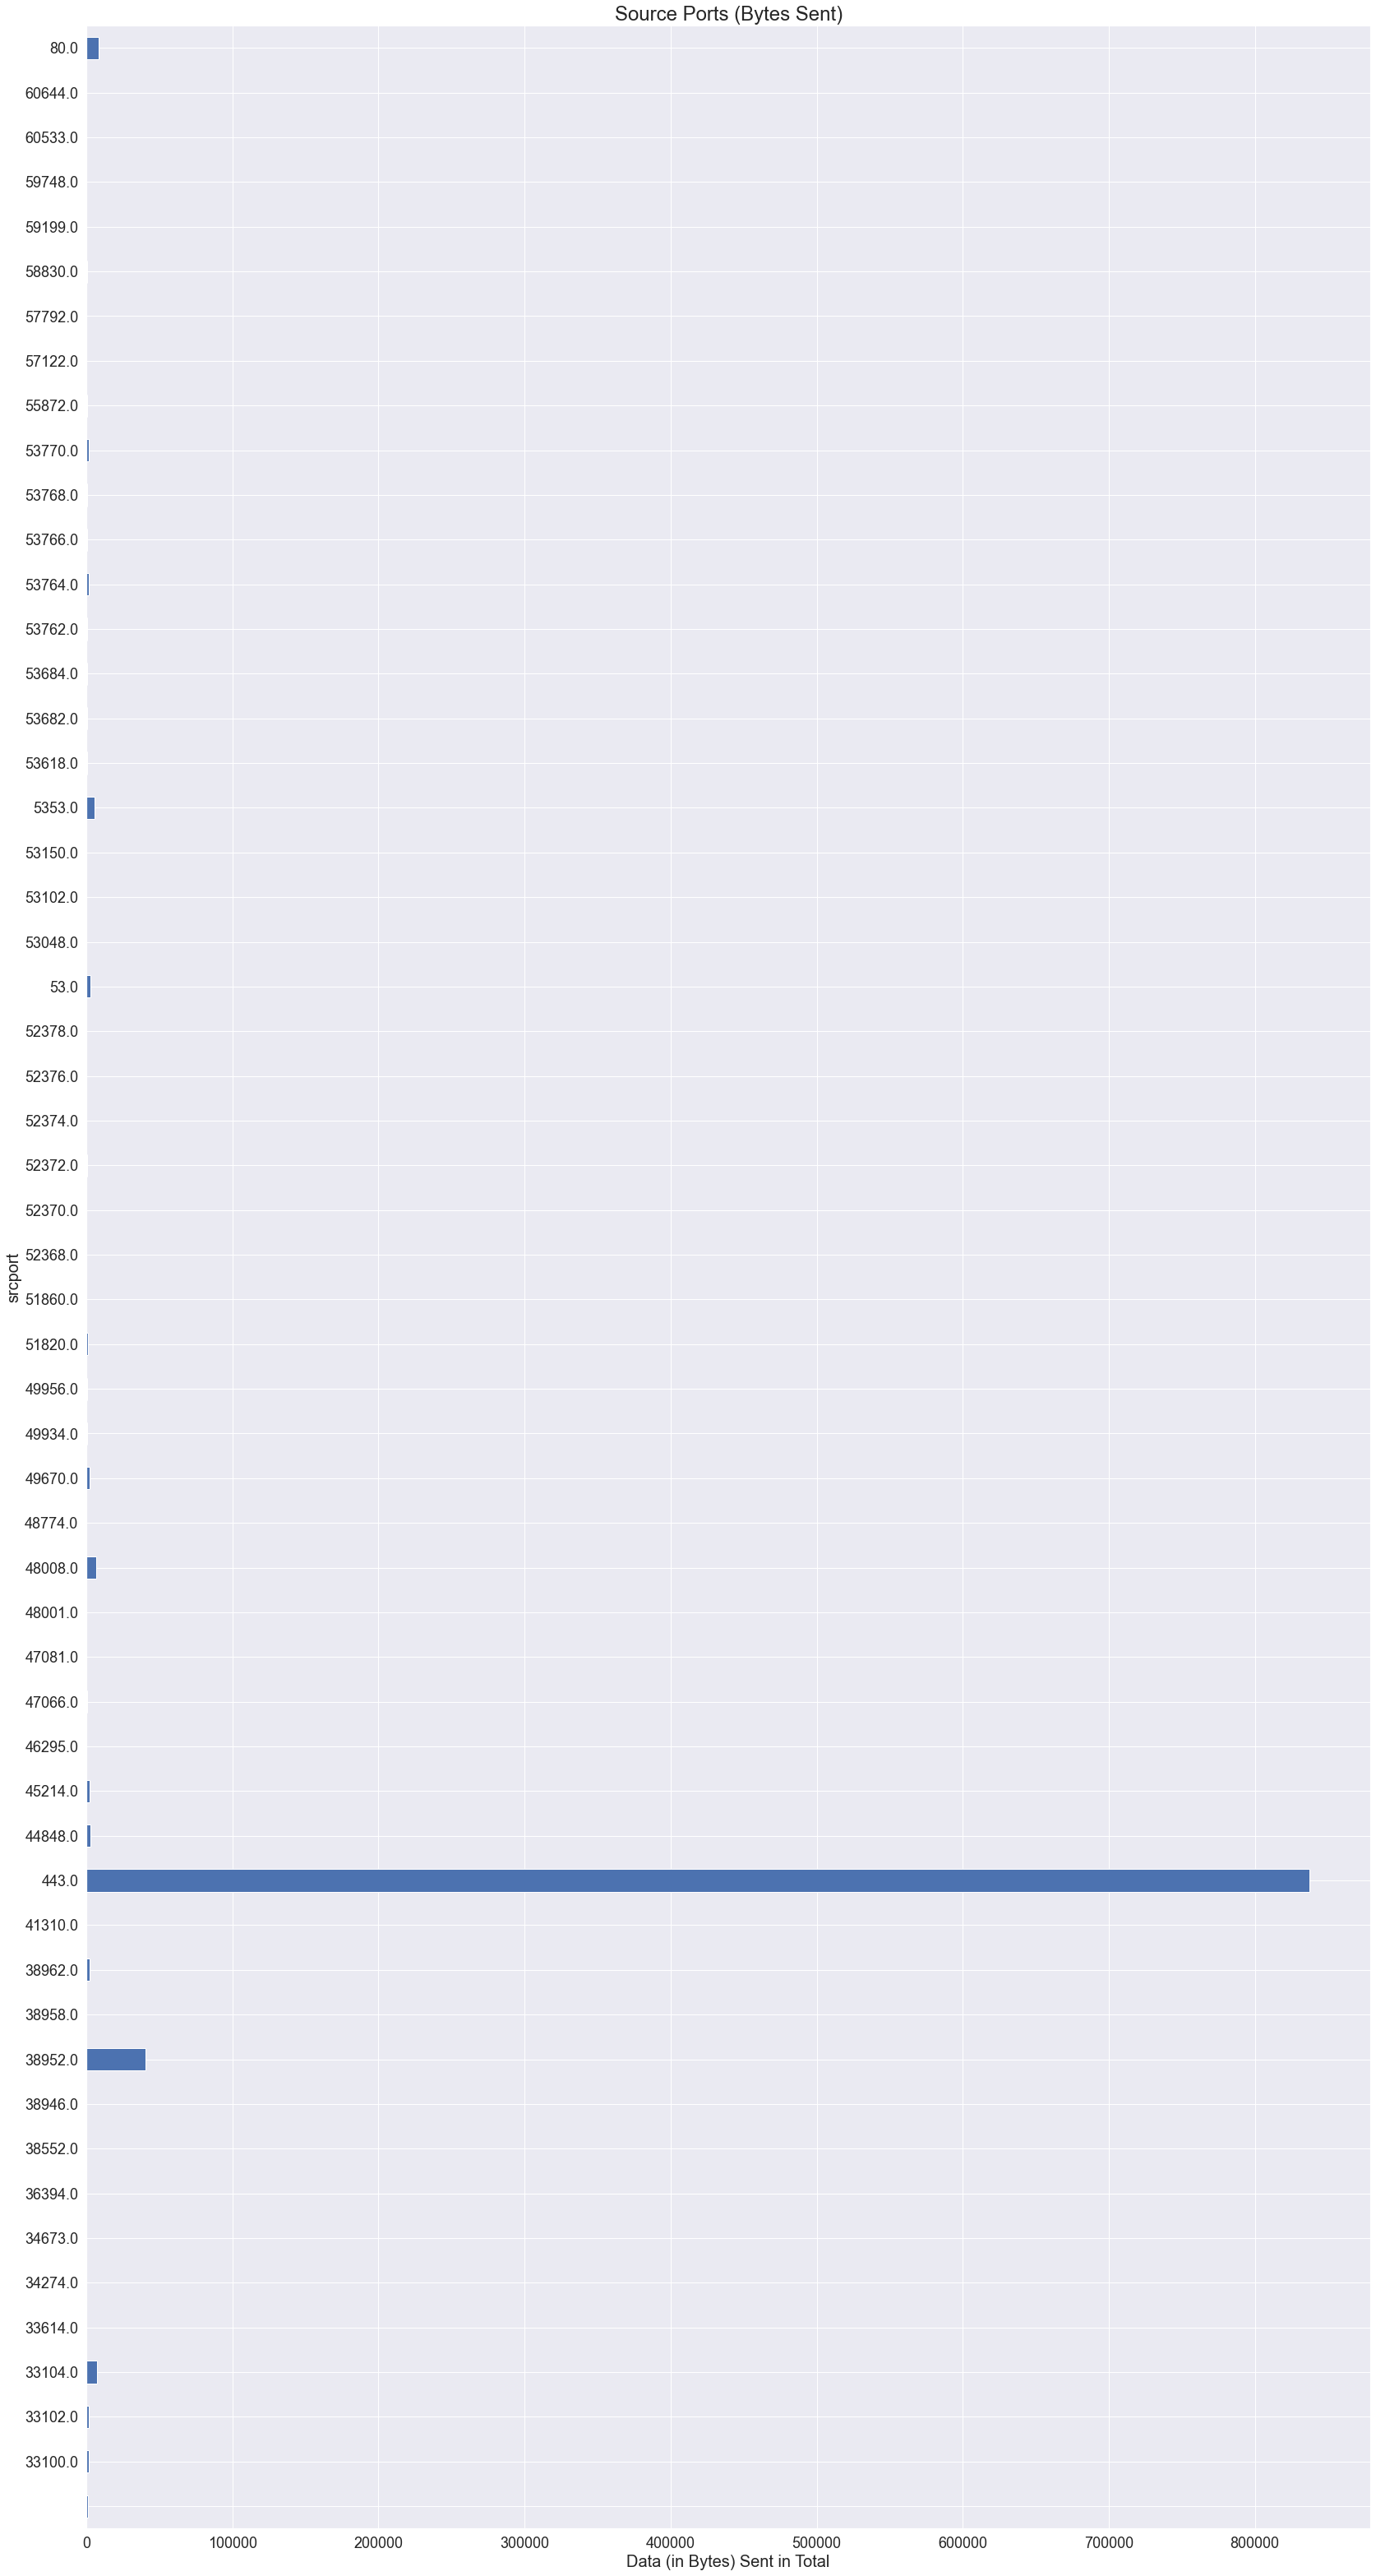

In [20]:
plot_source_port(df2,"ipv6")

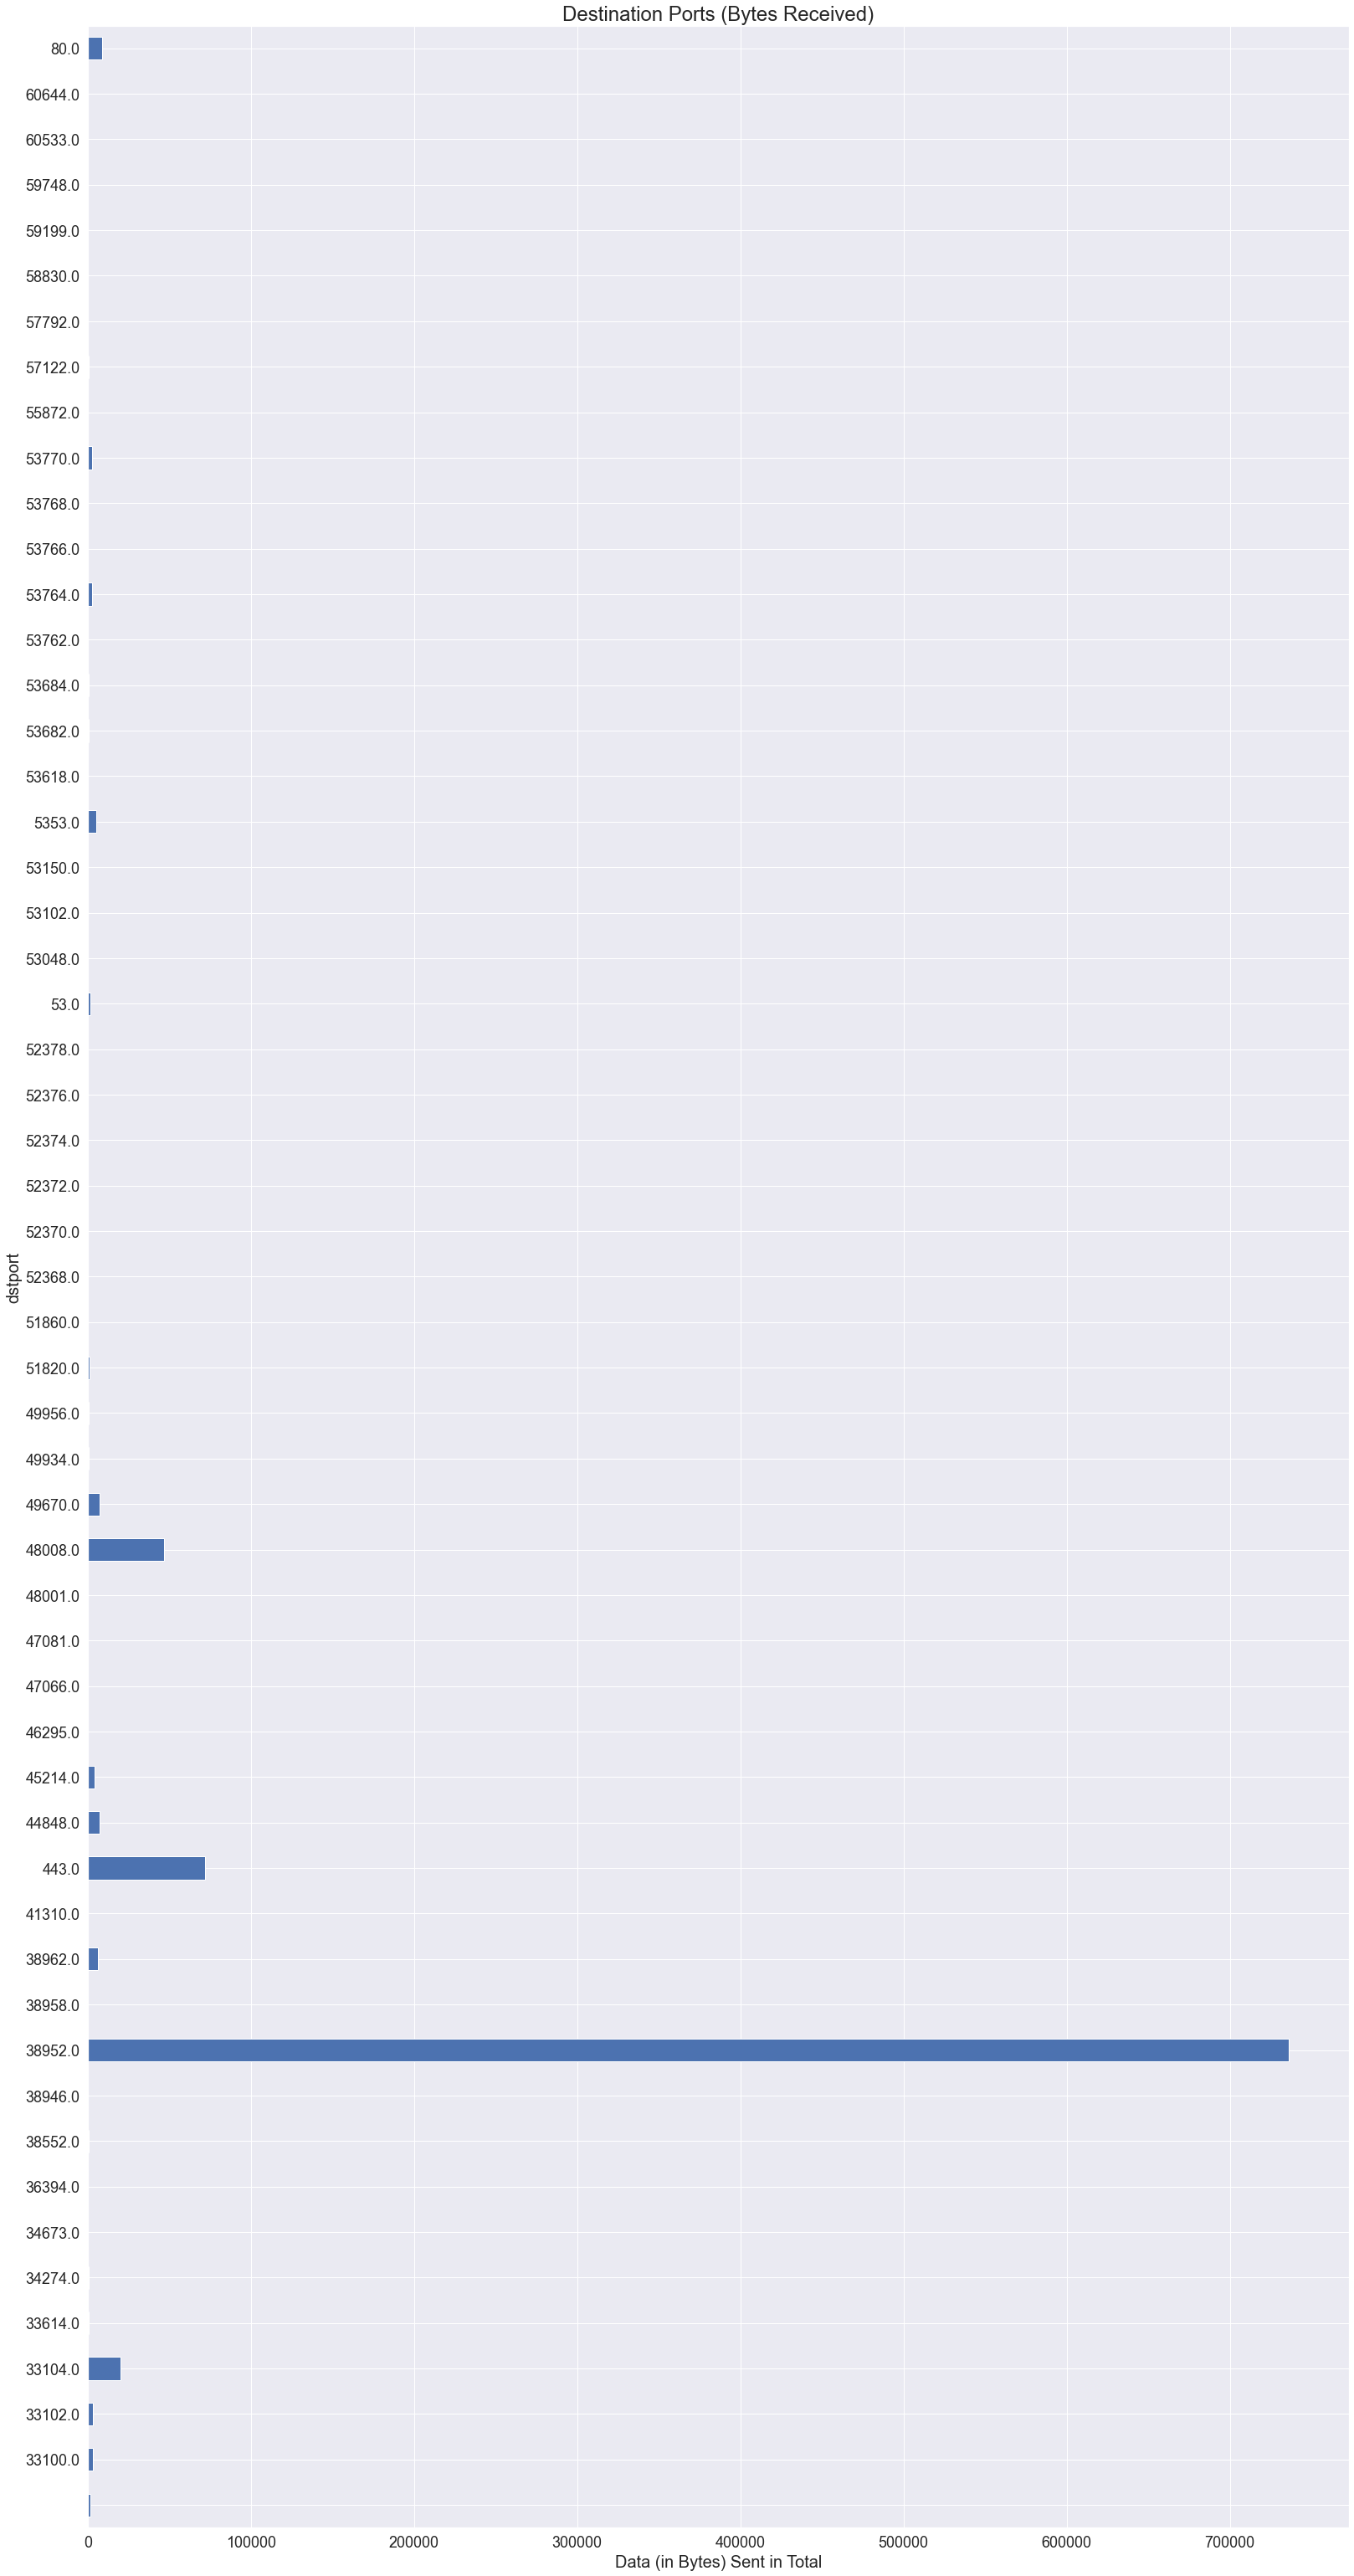

In [21]:
plot_destination_port(df2,"ipv6")

### TABLE STRUCTURE
<img src="images_in/4p.png">

In [22]:
print_frequent_charac(df1)

+----------------+----------------+----------------+---------+
|      TOP       |      PR1       |      PR2       |   PR3   |
+----------------+----------------+----------------+---------+
| 199.232.22.217 | 192.168.43.202 |     443.0      | 34318.0 |
| 192.168.43.202 | 199.232.22.217 |     443.0      | 34318.0 |
|     443.0      | 199.232.22.217 | 192.168.43.202 | 34318.0 |
|    34318.0     | 199.232.22.217 | 192.168.43.202 |  443.0  |
+----------------+----------------+----------------+---------+


In [23]:
print_frequent_charac(df2)

+--------------------------------------+----------------------------------------+----------------------------------------+---------+
|                 TOP                  |                  PR1                   |                  PR2                   |   PR3   |
+--------------------------------------+----------------------------------------+----------------------------------------+---------+
| 2409:4051:28f:a045:9895:7c:f6f4:15dd | 2606:2800:248:1707:10d3:19d0:1ba2:1a23 |                38952.0                 |  443.0  |
| 2409:4051:28f:a045:9895:7c:f6f4:15dd | 2606:2800:248:1707:10d3:19d0:1ba2:1a23 |                 443.0                  | 38952.0 |
|                443.0                 | 2606:2800:248:1707:10d3:19d0:1ba2:1a23 |  2409:4051:28f:a045:9895:7c:f6f4:15dd  | 38952.0 |
|                443.0                 |  2409:4051:28f:a045:9895:7c:f6f4:15dd  | 2606:2800:248:1707:10d3:19d0:1ba2:1a23 | 38952.0 |
+--------------------------------------+-----------------------------